# Project 1: Perceptron with Python 

## Huy Huynh

## DATA 4319

A Perceptron is an algorithm for supervised learning of binary classifiers. This algorithm enables neurons to learn and processes elements in the training set one at a time.

There are two types of Perceptrons: Single layer and Multilayer.

- Single layer Perceptrons can learn only linearly separable patterns.

- Multilayer Perceptrons or feedforward neural networks with two or more layers have the greater processing power.
    

The simplest neural network is one layer neural network (yeah, there are layers, like onions…). There are four components of the perceptron shown below:

- Input layers (X, Y, bias) and output
- Weights (w0, w1, w2)
- Weighted sum equation
- Activation function (sigmoid in this case)

The Perceptron algorithm learns the weights for the input signals in order to draw a linear decision boundary.

![1](https://www.cs.utexas.edu/~teammco/misc/perceptron/perceptron.png)

# Project #

In [8]:
%matplotlib inline

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load Data
train = pd.read_csv("Dataset/train.csv")
test  = pd.read_csv("Dataset/test.csv")

# Get some information about the data:
print("Training set has {0[0]} rows and {0[1]} columns".format(train.shape))
print("Test set has {0[0]} rows and {0[1]} columns".format(test.shape))



Training set has 42000 rows and 785 columns
Test set has 28000 rows and 784 columns


# Data
After loading the data, store it in the following format:

**Labels** (vector of length 42000)

**Training Data** (matrix of shape 42000,784; the labels are sliced off)

Each handwritten digit used for training is stored as a row in a matrix. 
Each row is 784 points long; this represents
pixel intensities of an image which is 28 by 28 pixels. The row must be reshaped in order to visualize it.

**Weights** (list of vectors, one vector for each class. 10 by 784)

Each weight vector is the same length as a handwritten digit vector. 

A sample digit from the dataset:
(10, 784)


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  """
/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:822: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  retval = getattr(retval, self.name)._getitem_axis(key, axis=i)


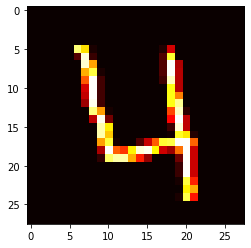

In [4]:
# Store the labels in a vector
trainlabels = train.label

# Store the data in a matrix (without labels)
traindata = np.asmatrix(train.ix[:,'pixel0':])
traindata.shape

# Visualize a single digit (one row from the training data matrix)
samplerow = traindata[3:4]#get one row from training data
samplerow = np.reshape(samplerow,(28,28))#reshape it to a 28*28 grid
print("A sample digit from the dataset:")
plt.imshow(samplerow, cmap="hot")

# Initialize the weight matrix (one row per class)
weights = np.zeros((10,784))
print(weights.shape)

# Perceptron Learning ( Training )
For each handwritten digit in the data set, compare its vector to each of the weight 
vectors by taking the dot product. 

The largest resulting dot product is the 'guess'.
If the guess is wrong, the incorrect weight vector is updated by subtracting the
digit vector and the correct weight vector is updated by adding the digit vector.

This routine repeats through the dataset many times (epochs) until the number of wrong guesses
begins to stabilize (in this case, 15 epochs. If you were to run 20 epochs, you'd see overfitting).

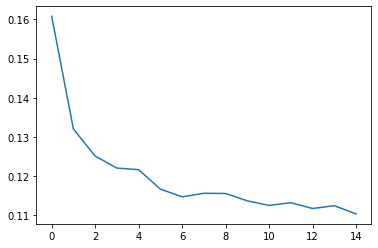

In [5]:
# For E epochs, 
E = 15
errors = []
for epoch in range(E):
    err = 0 #reset the error counter
    # For each handwritten digit in training set,
    for i, x in enumerate(traindata):
        dp=[] #create a new container for the calculated dot products
        # For each digit class (0-9)
        for w in weights:
            dotproduct = np.dot(x,w) #take the dot product of the weight and the data
            dp.append(dotproduct) #add the dot product to the list of dot products
        guess = np.argmax(dp) #take the largest dot product and make that the guessed digit class
        actual = trainlabels[i]
        # If the guess was wrong, update the weight vectors
        if guess != actual:
            weights[guess] = weights[guess] - x #update the incorrect (guessed) weight vector
            weights[actual] = weights[actual] + x #update the correct weight vector
            err += 1
    errors.append(err/42000) #track the error after each pass through the training set
plt.plot(list(range(0,E)),errors) #plot the error after all training epochs

# Perceptron Testing
Create a csv file to upload as submission.

In [6]:
testdata = np.asmatrix(test)
guesses = []
for i, z in enumerate(testdata):
    dp=[] #create a new container for the calculated dot products
    # For each digit class (0-9)
    for w in weights:
        dotproduct = np.dot(z,w) #take the dot product of the weight and the data
        dp.append(dotproduct) #add the dot product to the list of dot products
    guess = np.argmax(dp) #take the largest dot product and make that the guessed digit class
    guesses.append(guess)

In [7]:
f = open('percep1.csv', 'w')
i = 1
f.write('ImageId,Label\n')
for g in guesses:
    foo = str(i) + ',' + str(g) + '\n'
    f.write(foo)
    i += 1
f.close()
print(i)

28001
